# Proyecto integrador de Análisis de Datos

## Delitos en la Ciudad de Buenos Aires

#### Objetivo:
Analizar la problemática del delito en CABA con diversas herramientas utilizadas en el campo del Análisis de Datos.

### 1. Módulos necesarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Análisis

Para este trabajo se ha procedido a utilizar el dataset `delitos2019.csv`, que contiene una lista de todos los delitos cometidos en la Ciudad Autónoma de Buenos Aires a lo largo del año 2019.

#### 2.1 Visualización del dataset

Comienzo por importar el dataset y visualizar la estructura del mismo:

In [2]:
# Importar dataframe
data = pd.read_csv('delitos2019.csv')
data

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123
...,...,...,...,...,...,...,...,...,...,...
117656,486770,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145


A continuación procedo a ver los tipos de datos asignados a cada columna:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117661 entries, 0 to 117660
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   117661 non-null  int64  
 1   fecha                117661 non-null  object 
 2   franja_horaria       117661 non-null  object 
 3   tipo_delito          117661 non-null  object 
 4   subtipo_delito       11676 non-null   object 
 5   cantidad_registrada  117661 non-null  float64
 6   comuna               117064 non-null  float64
 7   barrio               117064 non-null  object 
 8   lat                  117064 non-null  float64
 9   long                 117064 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 9.0+ MB


#### 2.2 Cantidad de delitos y distribución geográfica

Deseo saber la cantidad total de delitos cometidos en el año, para lo cual realizo una suma acumulada de los registros presentes en la columna `cantidad_registrada`:

In [4]:
data['cantidad_registrada'].cumsum()

0              1.0
1              2.0
2              3.0
3              4.0
4              5.0
            ...   
117656    117664.0
117657    117665.0
117658    117666.0
117659    117667.0
117660    117668.0
Name: cantidad_registrada, Length: 117661, dtype: float64

Puede verse que, en total, se han registrado **117.668 delitos** en todo el año. Sería bueno conocer si existe alguna diferencia geográfica en la prevalencia de delitos, para lo cual procedo a agrupar los registros de cantidad según el barrio en que tuvieron lugar, e identificar los 5 barrios con mayor número de delitos:

In [5]:
delitos_por_barrio = data[['barrio','cantidad_registrada']].groupby('barrio').count()
delitos_por_barrio.sort_values('cantidad_registrada', ascending = False).nlargest(5, 'cantidad_registrada')

,cantidad_registrada
barrio,
Palermo,9559
Balvanera,9239
San Nicolás,6246
Recoleta,5589
Flores,5518


Ahora hago lo mismo, pero a la inversa: los 5 barrios con menos delitos.

In [6]:
delitos_por_barrio.sort_values('cantidad_registrada').nsmallest(5, 'cantidad_registrada')

,cantidad_registrada
barrio,
Puerto Madero,283
Villa Real,343
Versalles,392
Agronomía,454
Coghlan,476


#### 2.3 Delitos por franja horaria

Habiendo establecido previamente cuáles son los barrios con mayor o menor cantidades de delitos, quisiera analizar la distribución de los mismos según la franja horaria en que tienen lugar. Para lo cual procedo a determinar cuáles son los cinco horarios con mayor número de delitos:

In [7]:
horarios = data[['franja_horaria', 'cantidad_registrada']].groupby('franja_horaria').count()
horarios.sort_values('cantidad_registrada', ascending = False).nlargest(5, 'cantidad_registrada')

,cantidad_registrada
franja_horaria,
18,7415
19,7224
20,6990
17,6612
16,6518


A continuación hago lo mismo pero determinando cuáles son los cinco horarios con menos delitos:

In [13]:
# Remover datos con franja horaria indefinida
filtrado = data.loc[data['franja_horaria'] != 'S/D', ['franja_horaria','cantidad_registrada']]

horarios = filtrado[['franja_horaria', 'cantidad_registrada']].groupby('franja_horaria').count()
horarios.sort_values('cantidad_registrada').nsmallest(5, 'cantidad_registrada')

,cantidad_registrada
franja_horaria,
3,1719
4,1814
2,1965
5,2357
1,2445


#### 2.4 Delitos según fecha

Para ver en qué fecha del año se cometió la mayor cantidad de delitos, puede realizarse lo siguiente:

In [ ]:
fechas = data[['fecha', 'cantidad_registrada']].groupby('fecha').count()
fechas.sort_values('cantidad_registrada', ascending = False).nlargest(1, 'cantidad_registrada')

#### 2.5 Top 5 de barrios más peligrosos

Procedo a realizar un gráfico de barras con los cinco barrios donde se cometen más delitos:

Text(0, 0.5, 'Número de delitos')

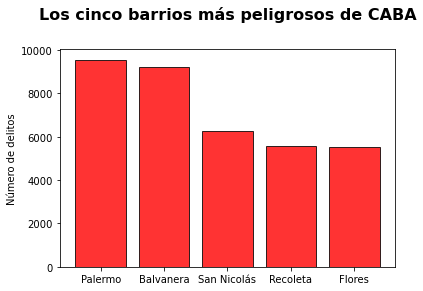

In [5]:
# Reorganización de los datos
barrios = data[['barrio', 'cantidad_registrada']].groupby('barrio').count()
top5 = barrios.sort_values('cantidad_registrada', ascending = False).nlargest(5, 'cantidad_registrada')

# Plot
plt.bar([1,2,3,4,5], top5['cantidad_registrada'], 
        tick_label=['Palermo', 'Balvanera', 'San Nicolás', 'Recoleta', 'Flores'],
        alpha=0.8,
        color='r',
        edgecolor='black')

fuente = {
          'family': 'sans-serif',
          'color':  'black',
          'weight': 'bold',
          'size': 16,
         }

plt.title('Los cinco barrios más peligrosos de CABA', fontdict = fuente, pad = 30)
plt.ylabel('Número de delitos')

#### 2.6 Top 5 de barrios más seguros

Similar al punto anterior, pero graficando los 5 barrios con menos delitos:

Text(0, 0.5, 'Número de delitos')

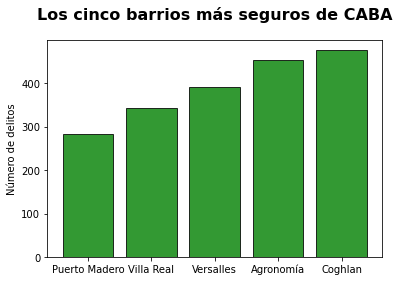

In [6]:
# Reorganización de los datos
top5 = barrios.sort_values('cantidad_registrada').nsmallest(5, 'cantidad_registrada')

# Plot
plt.bar([1,2,3,4,5], top5['cantidad_registrada'], 
        tick_label=['Puerto Madero', 'Villa Real', 'Versalles', 'Agronomía', 'Coghlan'],
        color = 'g',
        alpha=0.8,
        edgecolor='black')

fuente = {
          'family': 'sans-serif',
          'color':  'black',
          'weight': 'bold',
          'size': 16,
         }

plt.title('Los cinco barrios más seguros de CABA', fontdict = fuente, pad = 20)
plt.ylabel('Número de delitos')

#### 2.7 Delitos por mes

Para conocer cuál es el mes más inseguro de todos, procedo a realizar lo siguiente:

In [7]:
# Conversión de formato (objeto a datetime)
data['fecha'] = pd.to_datetime(data['fecha'])

# Crear columna "mes"
data['mes'] = pd.DatetimeIndex(data['fecha']).month

# Agrupar datos según mes y contar 
meses = data[['cantidad_registrada', 'mes']].groupby('mes').count()
meses

,cantidad_registrada
mes,
1,10503
2,10139
3,11244
4,10255
5,10442
6,9634
7,9042
8,9234
9,9042


En base a los cálculos realizados se puede concluir que el mes más inseguro del 2019 fue Marzo, con **11.244 delitos** en total.

#### 2.8 Delitos más frecuentes

Para finalizar el informe, procedo a realizar un gráfico de torta con los tipos de delitos cometidos:

In [8]:
# Reestructuración de los datos
delitos = data[['tipo_delito', 'cantidad_registrada']].groupby('tipo_delito').count()
delitos

,cantidad_registrada
tipo_delito,
Homicidio,186
Hurto (sin violencia),49271
Lesiones,5408
Robo (con violencia),62796


Text(0.5, 1.0, 'Tipos de delitos y sus frecuencias')

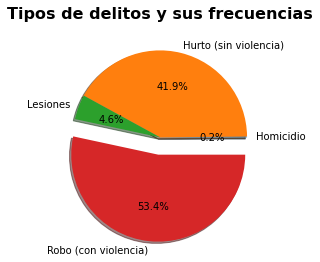

In [9]:
# Gráfico de torta
def func(pct):
  return "{:1.1f}%".format(pct)

plt.pie(delitos['cantidad_registrada'],
        labels = ['Homicidio', 'Hurto (sin violencia)', 'Lesiones', 'Robo (con violencia)'], 
        autopct=lambda pct: func(pct),
        shadow = True,
        explode = [0, 0, 0, 0.2])

fuente = {
          'family': 'sans-serif',
          'color':  'black',
          'weight': 'bold',
          'size': 16,
         }

plt.title('Tipos de delitos y sus frecuencias', fontdict = fuente, pad = 10)

## 3. Conclusiones

En base a lo expuesto en el análisis, puede concluirse que:

- **Los barrios más peligrosos de CABA son Palermo, Balvanera, San Nicolás, Recoleta y Flores**. Mientras que los barrios menos peligrosos son Puerto Madero, Villa Real, Versalles, Agronomía y Coghlan.

- La ejecución de diferentes delitos presenta una acumulación marcada en los horarios del atardecer, **siendo la franja horaria de las 18 hs. aquella en que se comete la mayor cantidad de delitos**. Esto contrasta con el bajo número de delitos cometidos a altas horas de la noche (2 A.M. a 5 A.M.)

- **El mes de Marzo fue el más peligroso del año**, ya que presenta no solamente el mayor número de delitos acumulados por mes, sino también el día con mayor cantidad de delitos de todo el 2019. También se observa una cantidad de delitos ligeramente mayor en el primer semestre.

- Los delitos más cometidos corresponden a aquellos realizados sobre la propiedad privada, con o sin uso de violencia, **concentrando poco más del 95% de los casos**. En segundo lugar están las lesiones, con poco menos del 5% de los casos, y en tercer lugar están los homicidios. 